# About The DataSet
The dataset and working belongs to getting started in NLP
Content:- The dataset contains email received. The dataset contains two columns Text and Spam.

v2 :- Text / Email received.

v1:- Whether the email received is spam/ham(legitimate)
Class 1: HAM (Legitimate)
Class 0: SPAM

Goal:- Using NLP we have to build a model for future mails that can classify into spam/ham

Terms used in NLP ['Tokenization','Stemming',TF-IDF','stopwords','corpus']

In [1]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding = 'cp1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.iloc[::,[0,1]]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.size

11144

In [6]:
df['v2'][6]  # sentence

'Even my brother is not like to speak with me. They treat me like aids patent.'

#### I want to give some relevant names to my columns

In [7]:
df = df.rename(columns = {'v1':'label' , 'v2':'message'})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [9]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Categoric into Numeric

spam = 0

ham = 1

In [10]:
df.label.replace({'spam':0 , 'ham':1},inplace = True) 

In [11]:
df.label.value_counts()

1    4825
0     747
Name: label, dtype: int64

In [12]:
# data preparation starts now
df.message = df.message.str.lower()
df.head()

,label,message
0,1,"go until jurong point, crazy.. available only ..."
1,1,ok lar... joking wif u oni...
2,0,free entry in 2 a wkly comp to win fa cup fina...
3,1,u dun say so early hor... u c already then say...
4,1,"nah i don't think he goes to usf, he lives aro..."


In [13]:
import nltk

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
len(stopwords.words('english'))

179

In [17]:
import string
string.punctuation  # only a special characters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### I will remove the stopwords , punctuation , tokenization (assign id to each word)

#### create a TDM the do sampling build the model do the prediction

In [18]:
def text_process(mess):
    '''
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc =  ''.join(nopunc)
    return[word for word in nopunc.split() if word not in stopwords.words('english')]

In [19]:
df.message.apply(text_process) # it is not save

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å£750, po...
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

#### to save the changes I use count vectorizer and save it to our new variable
#### countvectorizer tells hows many time my words is repeating in the dataset

In [20]:
after_transformation = CountVectorizer(analyzer = text_process).fit(df['message'])
after_transformation.vocabulary

<IPython.core.display.Javascript object>

In [21]:
len(after_transformation.vocabulary_)

9431

In [22]:
tdm_spamdata = after_transformation.transform(df['message'])
tdm_spamdata # TDM will act as my X values

<5572x9431 sparse matrix of type '<class 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [23]:
type(tdm_spamdata)

scipy.sparse.csr.csr_matrix

In [24]:
tdm_spamdata.shape

(5572, 9431)

In [25]:
abc = tdm_spamdata.toarray()
abc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
df1 = pd.DataFrame(abc)
df1  # 0 and 1

,0,1,2,3,4,5,6,7,8,9,...,9421,9422,9423,9424,9425,9426,9427,9428,9429,9430
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(tdm_spamdata , df.label , test_size=.2)

In [28]:
train_X.shape

(4457, 9431)

In [29]:
test_X.shape

(1115, 9431)

# Model Building  

#### some rules
##### Accuracy : higher the accuracy better the model
##### TPR(recalll) : higher the recall better the model
##### FPR lower the fpr better the model
##### Precision : higher the precision better the model
##### F1 : Higher the F! better the model

In [30]:
df.label.value_counts()

1    4825
0     747
Name: label, dtype: int64

As I can see that this data is huge imbalanced so I need to balanced the data with the help of stratified sampling . I can use under or oversampling also but I can see that the data of 0 and 1 is approx 1:7 Ratio 

In [31]:
747/(4825+747)

0.13406317300789664

In [32]:
1-0.13406317300789664

0.8659368269921034

In [33]:
4825/747

6.459170013386881

In [34]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(tdm_spamdata , df.label ,stratify=df.label, test_size=.2)

In [35]:
train_X.shape

(4457, 9431)

In [36]:
train_y.value_counts()

1    3859
0     598
Name: label, dtype: int64

In [37]:
test_y.value_counts()

1    966
0    149
Name: label, dtype: int64

In [38]:
598/3859

0.1549624254988339

In [39]:
149/966

0.15424430641821946

#### so I can see that ratio between 1 and 0 in train_y and test_y is same ..it means the problem of data imbalanced is solved now

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X , train_y)
pred_y = lr.predict(test_X)
from sklearn.metrics import accuracy_score,precision_score ,roc_auc_score, recall_score , f1_score , confusion_matrix
confusion_matrix(test_y , pred_y)

array([[132,  17],
       [  2, 964]], dtype=int64)

In [41]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9829596412556054
recall_score: 0.9979296066252588
precision: 0.9826707441386341
roc_curve: 0.9419178234468576
f1_score: 0.990241397021058


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0       0.99      0.89      0.93       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<AxesSubplot:>

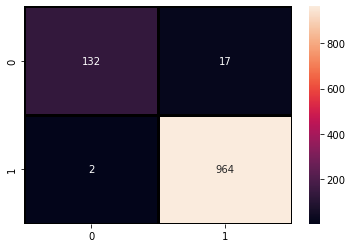

In [43]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y) , 
            annot = True , fmt = 'd' , linecolor = 'k', linewidth = 3 )
# line width = boundary of width
# line color = color of boundary
# fmt = 09.63+e**2 ko 963 me likhta hai

In [44]:
# CROSS VALIDATION OF LOGISTIC REGRESSSION
lr_grid = {'solver':['newton_cg','lbfgs','liblinear','sag','saga'],
          'penalty':['elasticnet','l1','l2']}
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr , param_grid = lr_grid)
grid_lr.fit(train_X , train_y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['elasticnet', 'l1', 'l2'],
                         'solver': ['newton_cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [45]:
grid_lr.best_params_

{'penalty': 'l2', 'solver': 'liblinear'}

In [46]:
lr = LogisticRegression(penalty = 'l2',solver = 'liblinear')
lr.fit(train_X , train_y)
pred_y = lr.predict(test_X)
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
confusion_matrix(test_y , pred_y)

array([[132,  17],
       [  3, 963]], dtype=int64)

In [47]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9820627802690582
recall_score: 0.9968944099378882
precision: 0.9826530612244898
roc_curve: 0.9414002251031723
f1_score: 0.9897225077081191


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



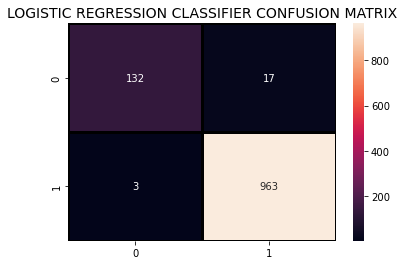

In [48]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# K NEAREST NEIGHBOURS

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[ 58,  91],
       [  0, 966]], dtype=int64)

In [50]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9183856502242153
recall_score: 1.0
precision: 0.9139072847682119
roc_curve: 0.6946308724832215
f1_score: 0.9550173010380623


              precision    recall  f1-score   support

           0       1.00      0.39      0.56       149
           1       0.91      1.00      0.96       966

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.76      1115
weighted avg       0.93      0.92      0.90      1115



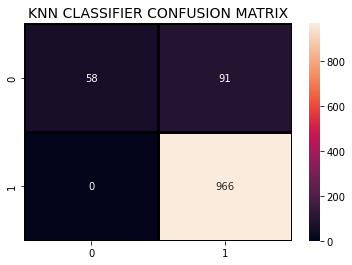

In [51]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [52]:
# CROSS VALIDATION OF KNN
parameter_dict={'n_neighbors':[1,11,21,31,41,51,75,101]}
from sklearn.model_selection import GridSearchCV
grid_df=GridSearchCV(knn,param_grid=parameter_dict)
grid_df.fit(train_X , train_y)
grid_df.best_params_

{'n_neighbors': 1}

In [53]:
knn=KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[ 91,  58],
       [  0, 966]], dtype=int64)

In [54]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9479820627802691
recall_score: 1.0
precision: 0.943359375
roc_curve: 0.8053691275167785
f1_score: 0.9708542713567839


              precision    recall  f1-score   support

           0       1.00      0.61      0.76       149
           1       0.94      1.00      0.97       966

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



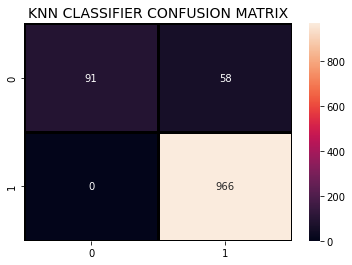

In [55]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# DECISION TREE CLASSIFIER

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[117,  32],
       [  8, 958]], dtype=int64)

In [57]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9641255605381166
recall_score: 0.9917184265010351
precision: 0.9676767676767677
roc_curve: 0.888476662914947
f1_score: 0.9795501022494887


In [58]:
# CROSS VALIDATION OF DECISION TREE CLASSIFIER
parameter_dict={'criterion':['gini','entropy'],'max_depth':[1,30,4],
    'min_samples_split':[1,2,3,4,5]}
grid_model=GridSearchCV(dt,param_grid=parameter_dict)
grid_model.fit(train_X , train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 30, 4],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [59]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}

In [60]:
dt=DecisionTreeClassifier(criterion='entropy' , max_depth=30 , min_samples_split=2)
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[116,  33],
       [  7, 959]], dtype=int64)

In [61]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9641255605381166
recall_score: 0.9927536231884058
precision: 0.9667338709677419
roc_curve: 0.8856385565606458
f1_score: 0.9795709908069458


              precision    recall  f1-score   support

           0       0.94      0.78      0.85       149
           1       0.97      0.99      0.98       966

    accuracy                           0.96      1115
   macro avg       0.95      0.89      0.92      1115
weighted avg       0.96      0.96      0.96      1115



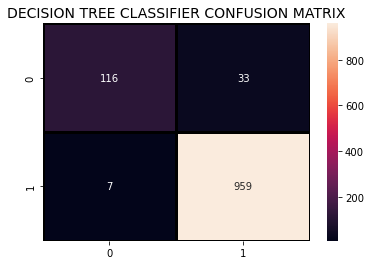

In [62]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# BAGGING CLASSIFIER

In [63]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier( n_estimators=100,bootstrap=True,oob_score=True,random_state=42)
bg.fit(train_X , train_y)
pred_y=bg.predict(test_X)
confusion_matrix(test_y,pred_y)

array([[120,  29],
       [  5, 961]], dtype=int64)

In [64]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9695067264573991
recall_score: 0.994824016563147
precision: 0.9707070707070707
roc_curve: 0.9000965720399627
f1_score: 0.9826175869120655


In [65]:
#CROSS VALIDATION OF BAGGING CLASSIFIER
from sklearn.model_selection import GridSearchCV
param_grid_bagging = {'n_estimators':list(range(1,100,10))}
grid = GridSearchCV(bg , param_grid=param_grid_bagging)
grid.fit(train_X , train_y)

GridSearchCV(estimator=BaggingClassifier(n_estimators=100, oob_score=True,
                                         random_state=42),
             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]})

In [66]:
grid.best_params_

{'n_estimators': 51}

In [67]:
bg = BaggingClassifier(n_estimators=21 , bootstrap=True , oob_score=True)
bg.fit(train_X , train_y)
pred_y = bg.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[121,  28],
       [  5, 961]], dtype=int64)

In [68]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9704035874439462
recall_score: 0.994824016563147
precision: 0.9716885743174924
roc_curve: 0.9034522767379494
f1_score: 0.9831202046035806


              precision    recall  f1-score   support

           0       0.96      0.81      0.88       149
           1       0.97      0.99      0.98       966

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



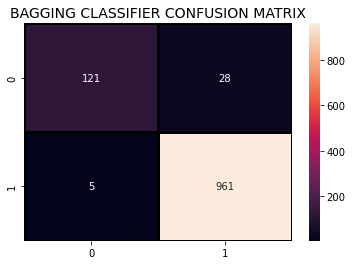

In [69]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("BAGGING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# RANDOM FOREST CLASSIFIER

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_X , train_y)
pred_y = rf.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[118,  31],
       [  0, 966]], dtype=int64)

In [71]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9721973094170404
recall_score: 1.0
precision: 0.9689067201604814
roc_curve: 0.8959731543624161
f1_score: 0.9842078451349974


              precision    recall  f1-score   support

           0       1.00      0.79      0.88       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



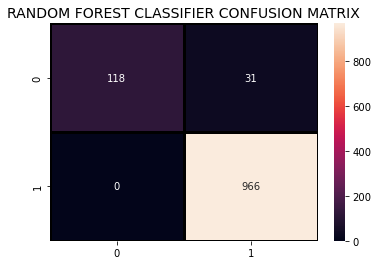

In [72]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# SUPPORT VECTOR CLASSIFIER

In [73]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(train_X , train_y)
pred_y=svm.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[123,  26],
       [  0, 966]], dtype=int64)

In [74]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9766816143497757
recall_score: 1.0
precision: 0.9737903225806451
roc_curve: 0.912751677852349
f1_score: 0.9867211440245148


              precision    recall  f1-score   support

           0       1.00      0.83      0.90       149
           1       0.97      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



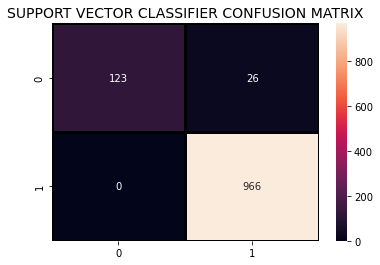

In [75]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [76]:
# CROSS VALIDATION WITH SVC
from sklearn.model_selection import GridSearchCV
param_dict = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'C' : list(range(1,10,1))}
svm_grid = GridSearchCV(svm , param_grid = param_dict)
svm_grid = svm_grid.fit(train_X , train_y)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [77]:
svm= SVC(C=1 , kernel = 'linear')
svm.fit(train_X , train_y)
pred_y=svm.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[134,  15],
       [  2, 964]], dtype=int64)

In [78]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9847533632286996
recall_score: 0.9979296066252588
precision: 0.9846782431052093
roc_curve: 0.9486292328428307
f1_score: 0.9912596401028279


              precision    recall  f1-score   support

           0       0.99      0.90      0.94       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



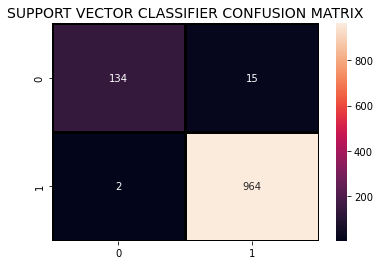

In [79]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

#  VOTING CLASSIFIER

In [80]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier([('svm',svm),('lr',lr),('knn',knn),('dt',dt),('rf',rf),('bg',bg)],voting='hard',n_jobs=5)
voting_clf.fit(train_X , train_y)
pred_y=voting_clf.predict(test_X)
confusion_matrix(test_y,pred_y)

array([[125,  24],
       [  1, 965]], dtype=int64)

In [81]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9775784753363229
recall_score: 0.9989648033126294
precision: 0.9757330637007078
roc_curve: 0.9189454889046368
f1_score: 0.9872122762148338


              precision    recall  f1-score   support

           0       0.99      0.84      0.91       149
           1       0.98      1.00      0.99       966

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



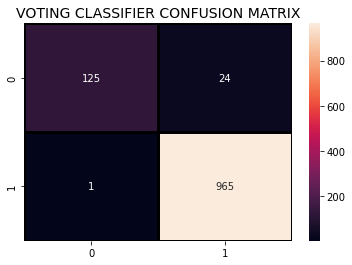

In [82]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("VOTING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# XGBOOST CLASSIFIER

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X , train_y)
pred_y = xgb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[130,  19],
       [  5, 961]], dtype=int64)

In [84]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.97847533632287
recall_score: 0.994824016563147
precision: 0.9806122448979592
roc_curve: 0.9336536190198285
f1_score: 0.987667009249743


              precision    recall  f1-score   support

           0       0.96      0.87      0.92       149
           1       0.98      0.99      0.99       966

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



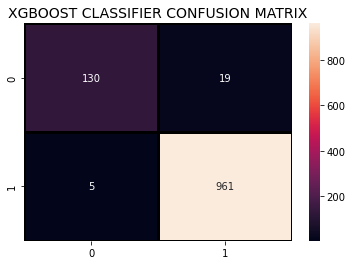

In [85]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBOOST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# Naive Baised Classifier

In [86]:
# By bernoulli NB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(train_X , train_y)
pred_y = bnb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[128,  21],
       [  3, 963]], dtype=int64)

In [87]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.97847533632287
recall_score: 0.9968944099378882
precision: 0.9786585365853658
roc_curve: 0.927977406311226
f1_score: 0.9876923076923078


In [88]:
# By MultinomialNB
from sklearn.naive_bayes import MultinomialNB
bnb = MultinomialNB()
bnb.fit(train_X , train_y)
pred_y = bnb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[142,   7],
       [ 21, 945]], dtype=int64)

In [89]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9748878923766816
recall_score: 0.9782608695652174
precision: 0.9926470588235294
roc_curve: 0.9656405018967025
f1_score: 0.9854014598540147


### To check My Algorithm working good or not

In [90]:
list1 = ['This is to update that an exclusive session on SQL has been arranged with Ms. Supriya Jadhav as on 12th & 13th February (arranged for PGA 29,30,31,32 & 33)',
         'Here is another opportunity to showcase your creativity and explore the field of Data Science and work upon some really challenging problem statements on your own. We came up with the theme of a Data Science Project Competition across all Imarticus centers.']
X_new = after_transformation.transform(list1)
svm.predict(X_new)

array([1, 1], dtype=int64)

# CONCLUSION

## Here I can see that , according to mee  CV_SVM shows me good result because if my mail is spam but it shows me spam so little bit count i'll accept but if my mail is HAM but it shows me spam so I'll not accept this so I'll go with  CV_SVM. 